# Worksheet 16

Name: Youxuan Ma

UID: U23330522

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    wx = sum(alpha_j * np.dot(x_j, x) for alpha_j, x_j in zip(alpha_i, X))
    return wx + b

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]

    ypred = predict(alpha_i, b, x)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        # classified correctly
        if ypred < 1 and ypred > -1:
            # in the street / street is too wide
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        else:
            # street is too narrow
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        # misclassified
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate

    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    format='GIF',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

#### Polynomial Kernel:

In [2]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

#### Modified predict function to use the polynomial kernel:

In [3]:
def predict(alpha_i, b, x, c=1, n=2):
    wx = sum(alpha_j * polynomial(x_j, x, c, n) for alpha_j, x_j in zip(alpha_i, X))
    return wx + b

#### Test Out On a Non-Linearly-Separable Dataset:

In [19]:
from sklearn.datasets import make_circles

# Create a non-linearly separable dataset
X, labels = make_circles(n_samples=20, factor=0.5, noise=0.1, random_state=0)
Y = np.array(list(map(lambda x: -1 if x == 0 else 1, labels)))

alpha_i = np.zeros((len(X),))
b = 0

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

images = []
for _ in range(epochs):
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    # Use the updated polynomial kernel for prediction
    ypred = predict(alpha_i, b, x)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        # classified correctly
        if ypred < 1 and ypred > -1:
            # in the street / street is too wide
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        else:
            # street is too narrow
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        # misclassified
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual_polynomial.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

In this case, I would lower the parameter `n` to reduce the model's complexity. 

This would lead to a smoother decision boundary that should generalize better on unseen data.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

As we learned in class, a large `sigma` simplifies the model by making the decision boundary smoother, but too large a value might cause underfitting as the model becomes too generalized.

Therefore, in this case, I would decrease `sigma` to allow the model to capture more complexity in the data to combat underfitting.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

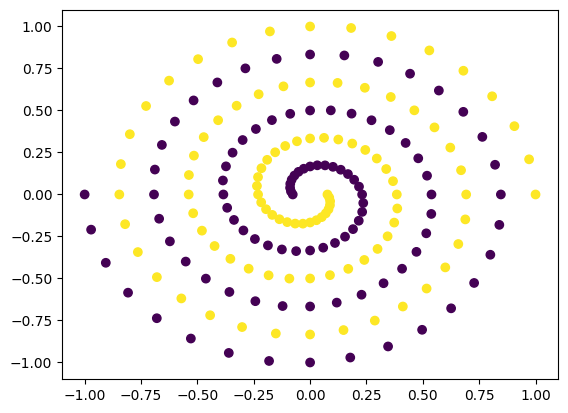

In [20]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

plt.scatter(x[:,0], x[:,1], c=y)

### Tunning the learning rate and the parameter of a RBF kernel:

In [30]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
X, labels = data[:, :2], data[:, 2]
Y = np.array(list(map(lambda x : -1 if x == -1 else 1, labels.tolist())))
labels = np.array(list(map(lambda x: 0 if x == -1 else 1, labels)))

def rbf_kernel(x_i, x_j, gamma):
    return np.exp(np.linalg.norm(x_i - x_j) / gamma)

def predict_rbf_kernelized(alpha_i, b, x, gamma):
    wx = sum(alpha_j * rbf_kernel(x_j, x, gamma) for alpha_j, x_j in zip(alpha_i, X))
    return wx + b

def predict_many_kernelized(alpha_i, b, Z, gamma):
    res = []
    for i in range(len(Z)):
        res.append(predict_rbf_kernelized(alpha_i, b, Z[i], gamma))
    return np.array(res)

def snap_kernelized(x, alpha_i, b, error, gamma):
    h = .05
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many_kernelized(alpha_i, b, meshData, gamma)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def snap_final(alpha_i, b, gamma):
    h = .05
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)
   
    Z = predict_many_kernelized(alpha_i, b, meshData, gamma)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.show()
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def calculate_accuracy(X, Y, alpha_i, b, gamma):
    predictions = predict_many_kernelized(alpha_i, b, X, gamma)
    predicted_classes = np.sign(predictions).astype(int)
    accuracy = np.mean(predicted_classes == Y)
    return accuracy

best_gamma = None
best_lr = None
best_accuracy = 0

gamma_values = [-0.01, -0.015, -0.02, -0.03, -0.035, -0.04, -0.045, -0.05]
lr_values = [0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

TEMPFILE = "temp2.png"
epochs = 300
expanding_rate = .99
retracting_rate = 1.1

for learning_rate in lr_values:
    for gamma in gamma_values:
        alpha_i = np.zeros((len(X),))
        b = 0

        for _ in range(epochs):
            i = np.random.randint(0, len(X))
            error = False
            x, y = X[i], Y[i]
            
            # Use the updated rbf kernel for prediction
            ypred = predict_rbf_kernelized(alpha_i, b, x, gamma)
            if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
                # classified correctly
                if ypred < 1 and ypred > -1:
                    # in the street / street is too wide
                    alpha_i[i] += y * learning_rate
                    alpha_i = alpha_i * retracting_rate           
                    b += y * learning_rate * retracting_rate
                else:
                    # street is too narrow
                    alpha_i = alpha_i * expanding_rate
                    b *= expanding_rate
            else:
                # misclassified
                alpha_i[i] += y * learning_rate
                alpha_i = alpha_i * expanding_rate
                b += y * learning_rate * expanding_rate

        accuracy = calculate_accuracy(X, Y, alpha_i, b, gamma)
        print(f"Gamma: {gamma}, Learning Rate: {learning_rate}, Accuracy: {accuracy}")
    
        # Update the best gamma and learning rate if the current model performs better
        if accuracy > best_accuracy:
            best_gamma = gamma
            best_lr = learning_rate
            best_accuracy = accuracy

# Output the best gamma value and its accuracy
print(f"Best Gamma: {best_gamma}, Best Learning Rate: {best_lr} Best Accuracy: {best_accuracy}")


Gamma: -0.01, Learning Rate: 0.15, Accuracy: 0.845360824742268
Gamma: -0.015, Learning Rate: 0.15, Accuracy: 0.9123711340206185
Gamma: -0.02, Learning Rate: 0.15, Accuracy: 0.9175257731958762
Gamma: -0.03, Learning Rate: 0.15, Accuracy: 0.8917525773195877
Gamma: -0.035, Learning Rate: 0.15, Accuracy: 0.8969072164948454
Gamma: -0.04, Learning Rate: 0.15, Accuracy: 0.865979381443299
Gamma: -0.045, Learning Rate: 0.15, Accuracy: 0.7835051546391752
Gamma: -0.05, Learning Rate: 0.15, Accuracy: 0.7938144329896907
Gamma: -0.01, Learning Rate: 0.2, Accuracy: 0.9123711340206185
Gamma: -0.015, Learning Rate: 0.2, Accuracy: 0.9175257731958762
Gamma: -0.02, Learning Rate: 0.2, Accuracy: 0.8969072164948454
Gamma: -0.03, Learning Rate: 0.2, Accuracy: 0.8917525773195877
Gamma: -0.035, Learning Rate: 0.2, Accuracy: 0.8865979381443299
Gamma: -0.04, Learning Rate: 0.2, Accuracy: 0.8762886597938144
Gamma: -0.045, Learning Rate: 0.2, Accuracy: 0.8762886597938144
Gamma: -0.05, Learning Rate: 0.2, Accuracy:

### Fitting the model with the optimal parameter and learning rate found above:

Also showing the plot for the final decision boundary

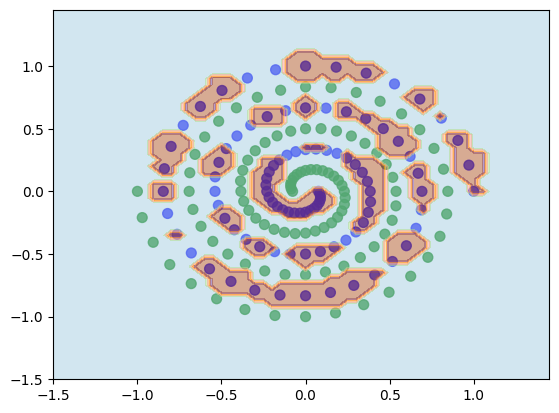

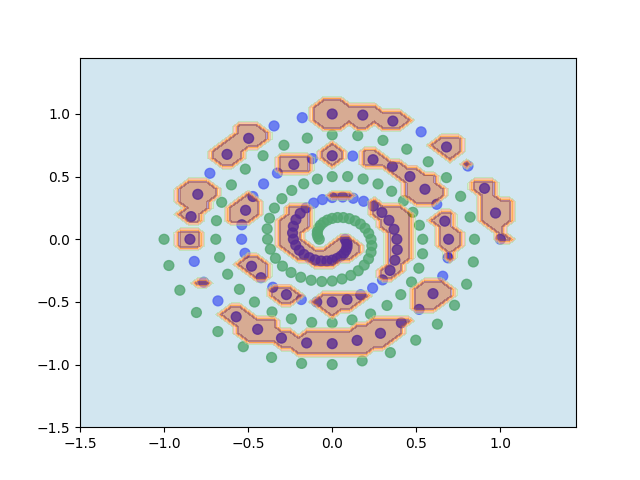

In [31]:
data = np.loadtxt("spiral.data")
X, labels = data[:, :2], data[:, 2]
Y = np.array(list(map(lambda x : -1 if x == -1 else 1, labels.tolist())))
labels = np.array(list(map(lambda x: 0 if x == -1 else 1, labels)))

gamma = best_gamma
learning_rate = best_lr
alpha_i = np.zeros((len(X),))
b = 0

for _ in range(epochs):
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    # Use the updated rbf kernel for prediction
    ypred = predict_rbf_kernelized(alpha_i, b, x, gamma)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        # classified correctly
        if ypred < 1 and ypred > -1:
            # in the street / street is too wide
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        else:
            # street is too narrow
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        # misclassified
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate

snap_final(alpha_i, b, gamma)

### Creating the animation GIF:

In [32]:
TEMPFILE = "temp2.png"
alpha_i = np.zeros((len(X),))
b = 0
gamma = best_gamma
learning_rate = best_lr

images = []
for _ in range(epochs):
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    # Use the updated rbf kernel for prediction
    ypred = predict_rbf_kernelized(alpha_i, b, x, gamma)
    if (ypred > 0 and y > 0) or (ypred < 0 and y < 0):
        # classified correctly
        if ypred < 1 and ypred > -1:
            # in the street / street is too wide
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        else:
            # street is too narrow
            alpha_i = alpha_i * expanding_rate
            b *= expanding_rate
    else:
        # misclassified
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate

    images.append(snap_kernelized(x, alpha_i, b, error, gamma))

images[0].save(
    'svm_spiral.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)